#pckges+data

In [ ]:
!pip install numpy==1.23.5
!pip install scipy==1.10.1
!pip install scikit-learn==1.2.2
!pip install pandas==1.5.3
!pip install tqdm==4.66.1
!pip install packaging==23.1
!pip install slicer==0.0.7
!pip install numba==0.56.4
!pip install cloudpickle==2.2.1
!pip install llvmlite==0.39.1
!pip install python-dateutil==2.8.2
!pip install pytz==2023.3
!pip install joblib==1.3.2
!pip install threadpoolctl==3.2.0
!pip install shap==0.42.1
!pip install umap-learn==0.5.3
!pip install pynndescent==0.5.10
!pip install hdbscan==0.8.33
!pip install cython==0.29.36
!pip install xgboost==1.7.6


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import shap
import xgboost as xgb
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score, train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/resendislab/POST_COVID_Metabolome_MachineLearning/main/Data/Data.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

,GROUP,GROUP2,Lactate/Pyruvate,Ornithine/Citrulline,Glutamine/Glutamate,Kynurenine/Tryptophan,Creatinine,Glycine,Alanine,Serine,...,Hydroxybutyrylcarnitine,Octanoylcarnitine,Decadienylcarnitine,Decenoylcarnitine,Decanoylcarnitine,Dodecenoylcarnitine,Dodecanoylcarnitine,Hexadecanoylcarnitine,Octadecadienylcarnitine,Octadecenoylcarnitine
Folio,,,,,,,,,,,,,,,,,,,,,
CV19-0007A,CONTROL,CONTROL,46.385542,3.851852,0.781818,0.086000,166.0,230.0,236,117.0,...,0.2001,0.1216,0.0789,0.2072,0.2437,0.1584,0.1266,0.2262,0.1301,0.2876
CV19-0071A,CONTROL,CONTROL,43.375000,3.500000,3.745283,0.047414,67.0,233.0,343,89.2,...,0.0741,0.2256,0.0695,0.2310,0.3679,0.1526,0.1123,0.1534,0.1190,0.2378
CV19-0079A,CONTROL,CONTROL,79.741379,6.798030,2.066667,0.031845,69.2,250.0,371,129.0,...,0.0416,0.0951,0.0996,0.1439,0.1661,0.0977,0.0860,0.2005,0.1604,0.3066
CV19-0118A,CONTROL,CONTROL,32.037815,1.931034,2.058824,0.029863,54.2,190.0,415,103.0,...,0.0291,0.2326,0.0705,0.2509,0.3039,0.1262,0.0775,0.0983,0.0702,0.1598
CV19-0125A,CONTROL,CONTROL,39.357430,2.014085,4.863813,0.041209,63.1,189.0,373,94.5,...,0.0592,0.1857,0.0709,0.2856,0.3549,0.1938,0.1446,0.1281,0.0998,0.2283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV19-0830A,CRITICALLY ILL,COVID-19,26.108597,6.527027,0.663755,0.216535,89.9,117.0,273,58.3,...,0.1570,0.1348,0.1569,0.2186,0.4441,0.1232,0.0938,0.1326,0.1060,0.2467
CV19-0833A,CRITICALLY ILL,COVID-19,33.262411,4.000000,3.410072,0.190736,112.0,162.0,497,88.7,...,0.0738,0.2481,0.1557,0.3837,0.6554,0.1521,0.0903,0.1158,0.0797,0.1718
CV19-0834A,CRITICALLY ILL,COVID-19,26.425532,9.014675,3.755411,0.099780,114.0,181.0,574,90.8,...,0.1481,0.2395,0.1776,0.3464,0.3441,0.2043,0.1211,0.1922,0.1354,0.3183


In [ ]:
df = df.set_index('Folio')

In [ ]:
matrix = df.iloc[:,2:]

In [ ]:
labels = df.iloc[:,:2]
labels

In [ ]:
labels['GROUP2'].unique()

array(['CONTROL', 'COVID-19', 'POST-COVID'], dtype=object)

#CONTROL VS post_COVID-19

In [ ]:
m_ctrl_vs_post_covid = matrix[labels['GROUP2'] != "COVID-19"]
l_ctrl_vs_post_covid  =labels[labels['GROUP2'] != "COVID-19"]
diccionary =  {'CONTROL':0,'POST-COVID':1}
l_ctrl_vs_post_covid  = l_ctrl_vs_post_covid ['GROUP2'].replace(diccionary)
X = m_ctrl_vs_post_covid
y = l_ctrl_vs_post_covid.values

randomized search

In [ ]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
"""
# Step 3: Define the parameter distribution for random search
param_dist = {
    'max_depth': randint(3, 7),
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'n_estimators': randint(100, 501),
    'subsample': uniform(0.4, 0.6),
    'colsample_bytree': uniform(0.4, 0.6),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
# Step 4: Create an XGBoost classifier
model = xgb.XGBClassifier()

# Step 5: Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=1500, cv=5,random_state=42)
random_search.fit(X_train, y_train)

# Step 6: Print the best hyperparameters and evaluation scores
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)
print("Test Set Score: ", random_search.score(X_test, y_test))
"""

'\n# Step 3: Define the parameter distribution for random search\nparam_dist = {\n    \'max_depth\': randint(3, 7),\n    \'learning_rate\': [0.1, 0.01, 0.001, 0.0001],\n    \'n_estimators\': randint(100, 501),\n    \'subsample\': uniform(0.4, 0.6),\n    \'colsample_bytree\': uniform(0.4, 0.6),\n    \'gamma\': [0, 0.1, 0.2, 0.3, 0.4, 0.5],\n    \'reg_alpha\': [0, 0.1, 0.5, 1],\n    \'reg_lambda\': [0, 0.1, 0.5, 1]\n}\n# Step 4: Create an XGBoost classifier\nmodel = xgb.XGBClassifier()\n\n# Step 5: Perform random search\nrandom_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=1500, cv=5,random_state=42)\nrandom_search.fit(X_train, y_train)\n\n# Step 6: Print the best hyperparameters and evaluation scores\nprint("Best Hyperparameters: ", random_search.best_params_)\nprint("Best Score: ", random_search.best_score_)\nprint("Test Set Score: ", random_search.score(X_test, y_test))\n'

In [ ]:
best_params_=  {'colsample_bytree': 0.6249223477142225, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 216, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.4072926848138898}


In [ ]:
#best_params_=  {'colsample_bytree': 0.8625803079727365, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 114, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.663601901119462}

"""
Best Hyperparameters:  {'colsample_bytree': 0.8625803079727365, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 114, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.663601901119462}
Best Score:  0.8889162561576354
Test Set Score:  0.9444444444444444
"""

Accuracy: 0.9444444444444444
AUC: 1.0


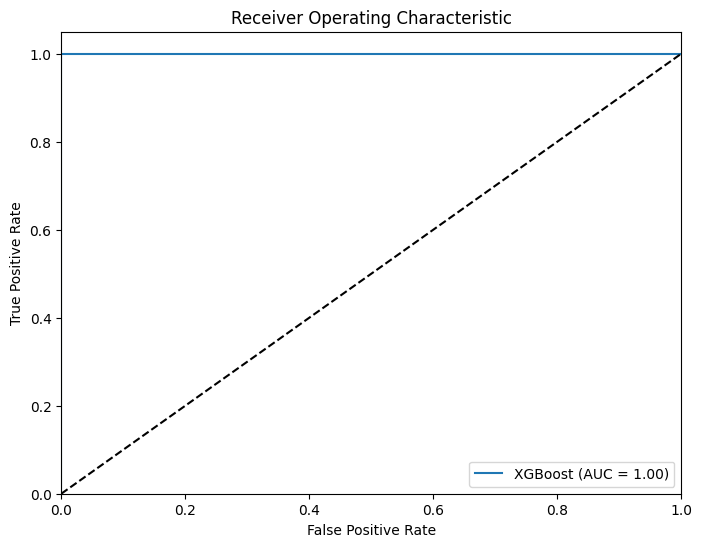

Cross-Validation Scores: [1.         1.         1.         1.         0.88235294]
Average CV Accuracy: 0.9764705882352942


In [ ]:
X = m_ctrl_vs_post_covid
y = l_ctrl_vs_post_covid.values

#Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the XGBoost classifier
model = xgb.XGBClassifier(**best_params_)
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


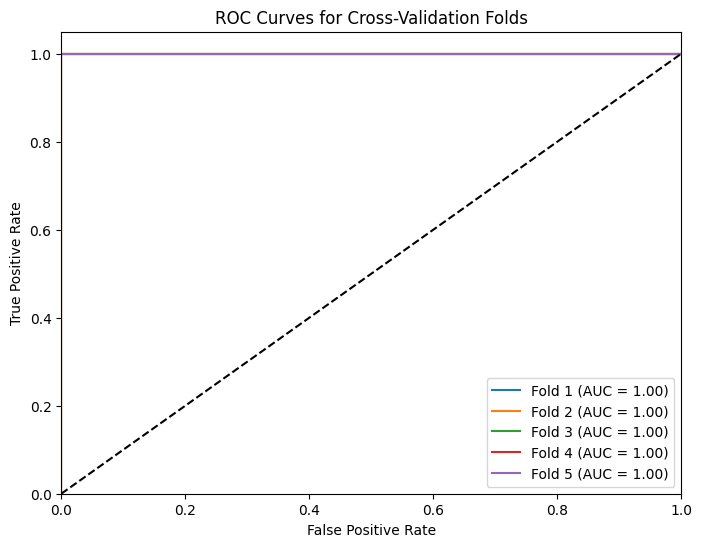

In [ ]:
# Train the XGBoost classifier and plot individual ROC curves for each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(8, 6))
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = xgb.XGBClassifier(**best_params_)
    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cross-Validation Folds')
plt.legend(loc='lower right')
plt.show()



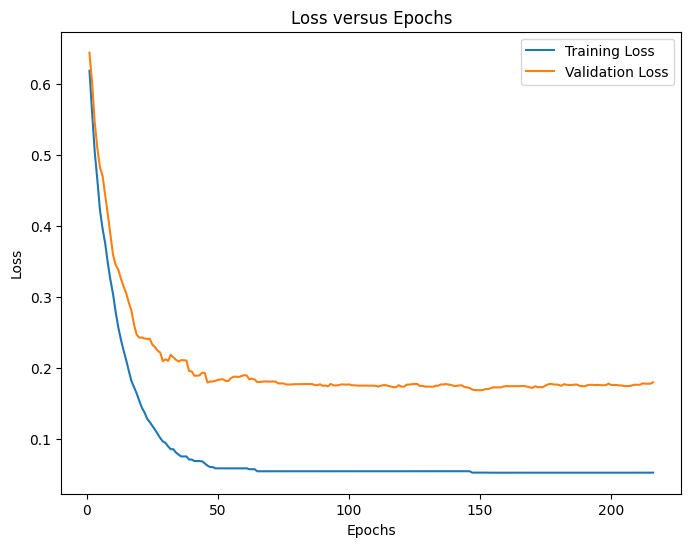

In [ ]:

#Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Train the XGBoost classifier with monitoring the loss
model = xgb.XGBClassifier(**best_params_,eval_metric='logloss')
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

#Extract the training history
results = model.evals_result()
train_loss = results['validation_0']['logloss']
test_loss = results['validation_1']['logloss']
epochs = range(1, len(train_loss) + 1)

#Plot the loss versus epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, test_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss versus Epochs')
plt.legend()
plt.show()


#SHAP

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create an XGBoost classifier with early stopping
model = xgb.XGBClassifier(**best_params_, eval_metric='logloss')
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=40, eval_set=eval_set, verbose=False)

#Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Accuracy: 0.9444444444444444


In [ ]:
# save pickle shaps
with open('shap_values_ctrl_postcovid.pkl', 'wb') as file:
    pickle.dump(shap_values, file)


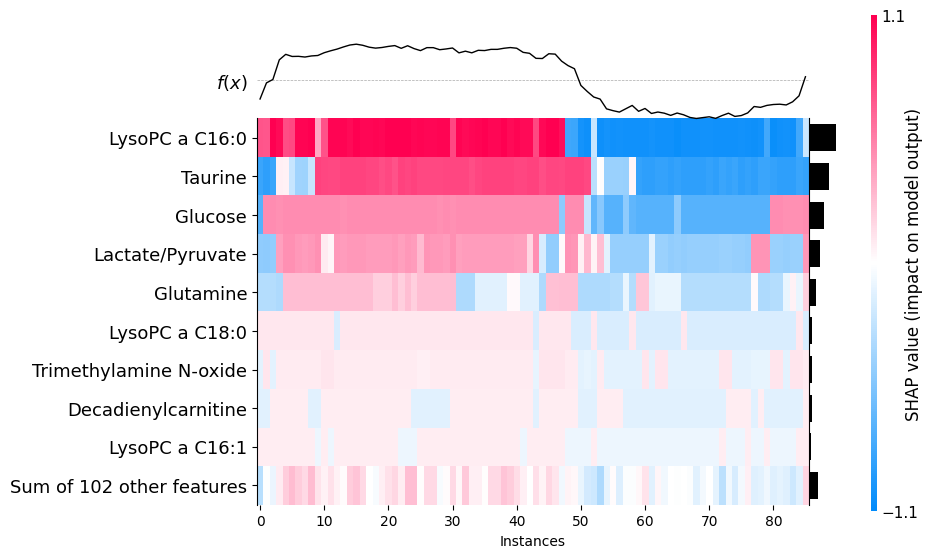

In [ ]:
shap_values_explaination = shap.Explanation(shap_values, feature_names=m_ctrl_vs_post_covid.columns.tolist())
shap.plots.heatmap(shap_values_explaination)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


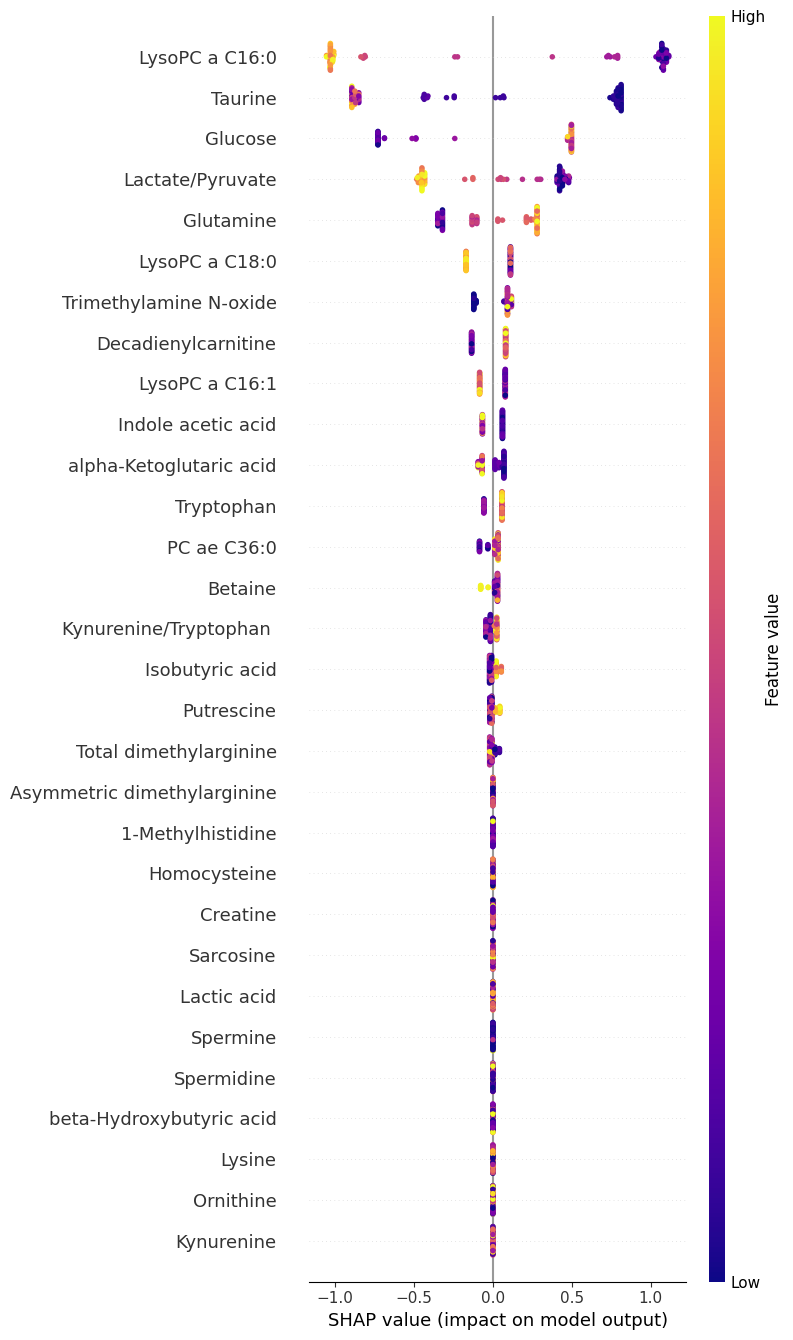

In [ ]:
shap.summary_plot(shap_values, X,cmap = "plasma",max_display=30)

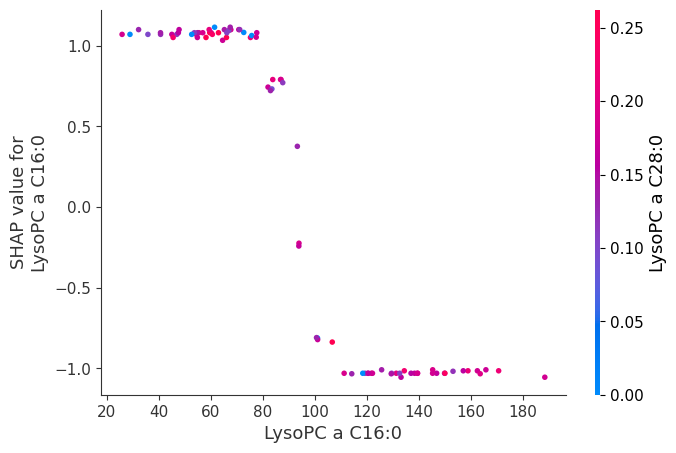

In [ ]:
shap.dependence_plot('LysoPC a C16:0', shap_values, X, interaction_index="LysoPC a C28:0")

In [ ]:
labels['GROUP2']

Folio
CV19-0007A     CONTROL
CV19-0071A     CONTROL
CV19-0079A     CONTROL
CV19-0118A     CONTROL
CV19-0125A     CONTROL
                ...   
CV19-0830A    COVID-19
CV19-0833A    COVID-19
CV19-0834A    COVID-19
CV19-0932A    COVID-19
CV19-0936A    COVID-19
Name: GROUP2, Length: 228, dtype: object

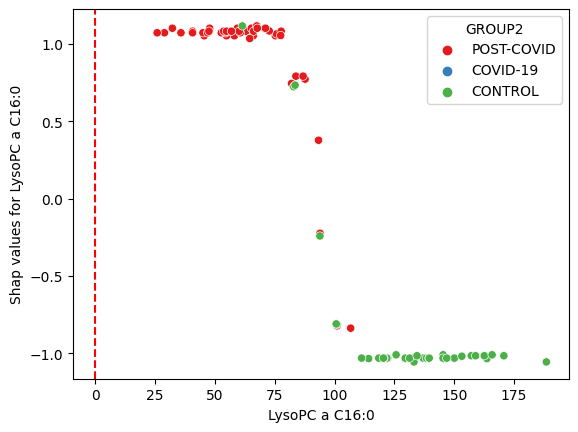

In [ ]:
string = 'LysoPC a C16:0'
xx= X[string]
yy = pd.DataFrame( shap_values,columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=labels['GROUP2'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.05 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

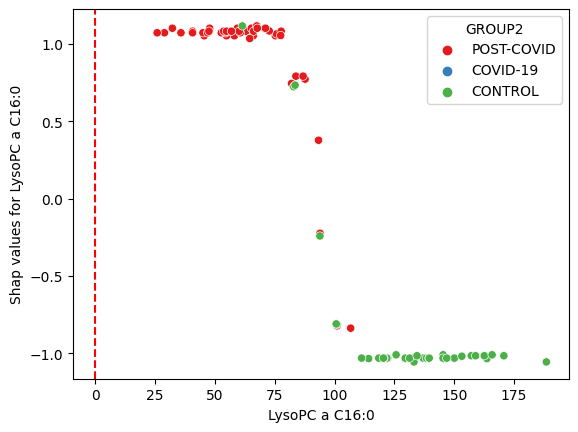

In [ ]:
#indicios de grupos heterogeneos
string = 'LysoPC a C16:0'
xx= X[string]
yy = pd.DataFrame( shap_values,columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=labels['GROUP2'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.05 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

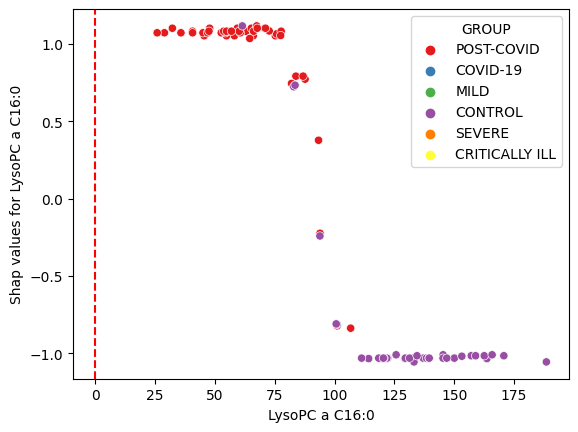

In [ ]:
#indicios de grupos heterogeneos
string = 'LysoPC a C16:0'
xx= X[string]
yy = pd.DataFrame( shap_values,columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=labels['GROUP'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.05 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,X, feature_names=X.columns,plot_cmap = "PkYg",figsize=(90, 90))

##UMAP-SHAP

In [ ]:
from umap import UMAP
model = UMAP(n_components = 2,  verbose = 2, metric='euclidean',random_state=10,n_neighbors=15,n_epochs=500)
umap_2d = model.fit_transform(shap_values)
CONTI_DF = pd.DataFrame(umap_2d,columns=['UMAP1','UMAP2'],index=m_ctrl_vs_post_covid.index)




UMAP(n_epochs=500, random_state=10, verbose=2)
Tue Nov 14 18:39:20 2023 Construct fuzzy simplicial set
Tue Nov 14 18:39:21 2023 Finding Nearest Neighbors
Tue Nov 14 18:39:26 2023 Finished Nearest Neighbor Search
Tue Nov 14 18:39:30 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Nov 14 18:39:31 2023 Finished embedding


In [ ]:
m_ctrl_vs_post_covid= matrix[labels['GROUP2'] != "COVID-19"]
l_ctrl_vs_post_covid =labels[labels['GROUP2'] != "COVID-19"]

In [ ]:
CONTI_DF

,UMAP1,UMAP2
Folio,,
CV19-0007A,4.268087,3.670442
CV19-0071A,10.569529,5.121854
CV19-0079A,11.382056,4.518438
CV19-0118A,9.121019,3.346980
CV19-0125A,8.981688,3.286974
...,...,...
5V,4.029448,2.969138
6V,4.136841,3.161860
7V,4.040813,0.891364


In [ ]:
CONTI_DF.to_csv('umap_hdbscan.csv')

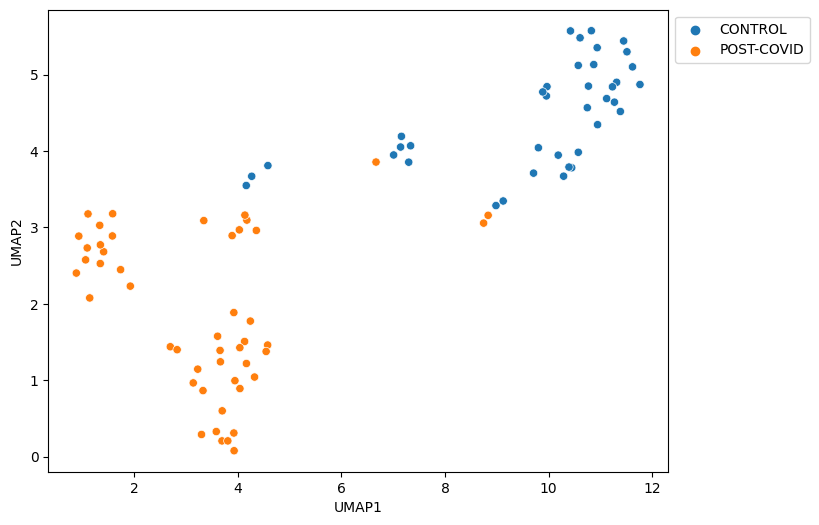

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=l_ctrl_vs_post_covid['GROUP'], legend='full')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

In [ ]:
shaps  = pd.DataFrame(shap_values, columns= m_ctrl_vs_post_covid.columns,index=m_ctrl_vs_post_covid.index)

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


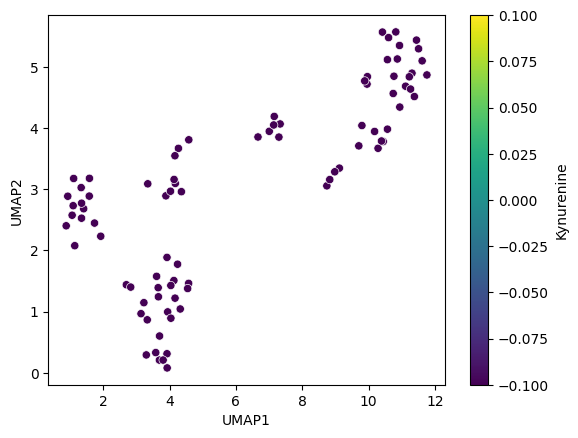

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a continuous color scale
sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], c=shaps['Kynurenine'], cmap='viridis')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')



# Get the color values for the scatter plot
color_values = shaps['Kynurenine']

# Create a colorbar using the color values
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(color_values)

# Add a colorbar to the right of the plot
cbar = plt.colorbar(sm)
cbar.set_label('Kynurenine')

# Show the plot
plt.show()
# Show the plot
plt.show()


Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


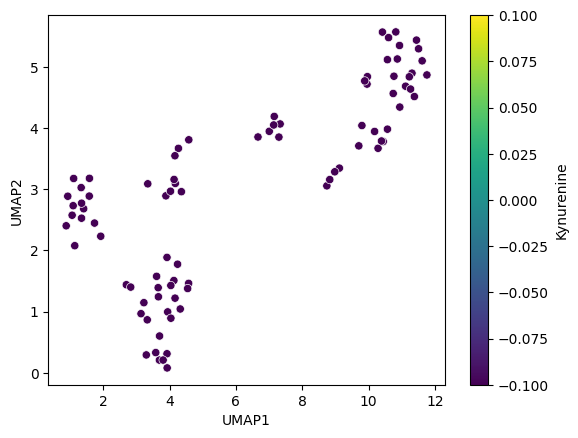

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a continuous color scale
scatter_plot = sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], c=shaps['Kynurenine'], cmap='viridis')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Get the color values for the scatter plot
color_values = shaps['Kynurenine']

# Create a colorbar using the color values
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(color_values)

# Add a colorbar to the right of the plot
cbar = plt.colorbar(sm)
cbar.set_label('Kynurenine')

# Show the plot
plt.show()



In [ ]:
import plotly.express as px
# labels labels_umap_
fig = px.scatter(CONTI_DF, x='UMAP1', y='UMAP2', color=shaps['Kynurenine'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'

})
fig.update_traces(marker=dict(size=15))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=15,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
CONTI_DF

In [ ]:
from umap import UMAP
model = UMAP(n_components = 30,  verbose = 2, metric='euclidean',
             random_state=10,n_neighbors=15,n_epochs=500,min_dist=0.01)
umap_2d = model.fit_transform(shap_values)
CONTI_DF_1 = pd.DataFrame(umap_2d,index=m_ctrl_vs_post_covid.index)

import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=7,cluster_selection_method='leaf', min_samples=4)
clusterer.fit(CONTI_DF_1)
labels = clusterer.labels_


UMAP(min_dist=0.01, n_components=30, n_epochs=500, random_state=10, verbose=2)
Tue Nov 14 18:39:34 2023 Construct fuzzy simplicial set
Tue Nov 14 18:39:34 2023 Finding Nearest Neighbors
Tue Nov 14 18:39:34 2023 Finished Nearest Neighbor Search
Tue Nov 14 18:39:34 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Nov 14 18:39:36 2023 Finished embedding


In [ ]:
import plotly.express as px
# labels labels_umap_
fig = px.scatter(CONTI_DF, x='UMAP1', y='UMAP2', color=labels)

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'

})
fig.update_traces(marker=dict(size=15))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=15,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

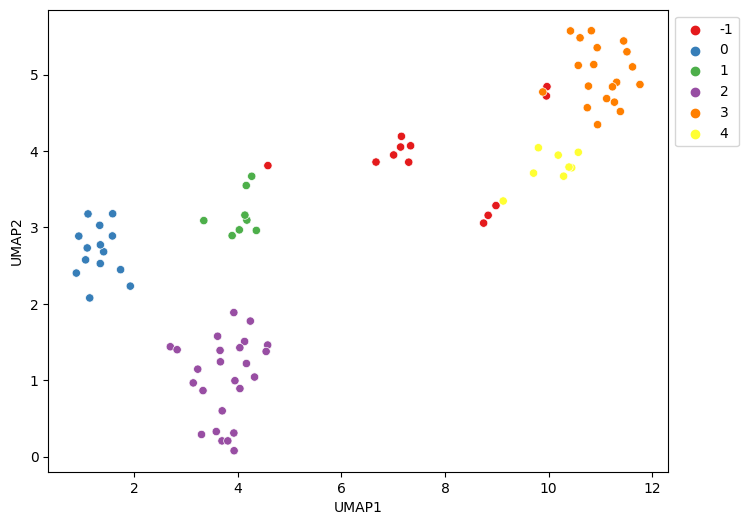

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=labels, legend='full',palette='Set1')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

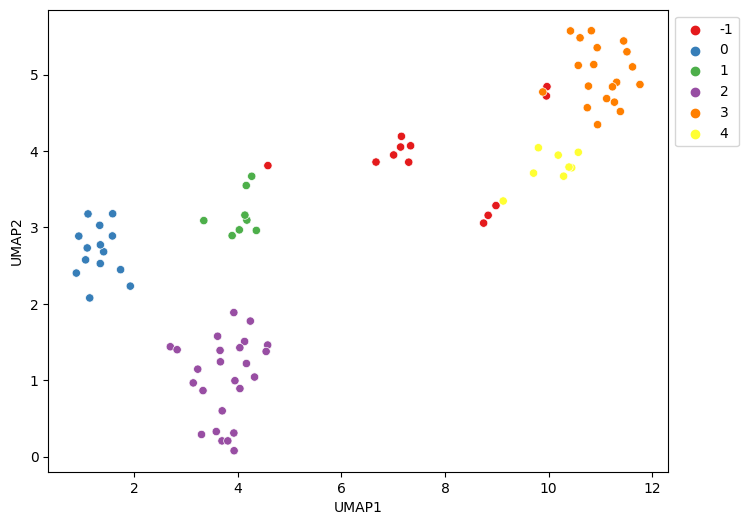

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=labels, legend='full', palette='Set1')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save the plot with higher resolution
plt.savefig('scatter_plot.png', dpi=600, bbox_inches='tight')  # Adjust the file name and format as desired

# Show the plot
plt.show()

In [ ]:
CONTI_DF['hdbscan']  = labels

In [ ]:
CONTI_DF

,UMAP1,UMAP2,hdbscan
Folio,,,
CV19-0007A,4.268087,3.670442,1
CV19-0071A,10.569529,5.121854,3
CV19-0079A,11.382056,4.518438,3
CV19-0118A,9.121019,3.346980,4
CV19-0125A,8.981688,3.286974,-1
...,...,...,...
5V,4.029448,2.969138,1
6V,4.136841,3.161860,1
7V,4.040813,0.891364,2


In [ ]:
m_ctrl_vs_post_covid_HDBSCAN = m_ctrl_vs_post_covid[labels != -1]
m_ctrl_vs_post_covid_HDBSCAN['hdbscan'] =labels[labels != -1]
m_ctrl_vs_post_covid_HDBSCAN

<ipython-input-38-40a72cad4483>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lactate/Pyruvate,Ornithine/Citrulline,Glutamine/Glutamate,Kynurenine/Tryptophan,Creatinine,Glycine,Alanine,Serine,Proline,Valine,...,Octanoylcarnitine,Decadienylcarnitine,Decenoylcarnitine,Decanoylcarnitine,Dodecenoylcarnitine,Dodecanoylcarnitine,Hexadecanoylcarnitine,Octadecadienylcarnitine,Octadecenoylcarnitine,hdbscan
Folio,,,,,,,,,,,,,,,,,,,,,
CV19-0007A,46.385542,3.851852,0.781818,0.086000,166.0,230.0,236,117.0,151.0,170.0,...,0.1216,0.0789,0.2072,0.2437,0.1584,0.1266,0.2262,0.1301,0.2876,1
CV19-0071A,43.375000,3.500000,3.745283,0.047414,67.0,233.0,343,89.2,151.0,145.0,...,0.2256,0.0695,0.2310,0.3679,0.1526,0.1123,0.1534,0.1190,0.2378,3
CV19-0079A,79.741379,6.798030,2.066667,0.031845,69.2,250.0,371,129.0,175.0,207.0,...,0.0951,0.0996,0.1439,0.1661,0.0977,0.0860,0.2005,0.1604,0.3066,3
CV19-0118A,32.037815,1.931034,2.058824,0.029863,54.2,190.0,415,103.0,165.0,149.0,...,0.2326,0.0705,0.2509,0.3039,0.1262,0.0775,0.0983,0.0702,0.1598,4
CV19-0128A,33.155792,4.163823,3.213592,0.039387,71.4,345.0,311,165.0,198.0,214.0,...,0.1536,0.1792,0.1992,0.1747,0.1008,0.1140,0.1732,0.1724,0.2346,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5V,13.467742,2.299296,6.856011,0.045970,65.4,247.0,438,93.3,240.0,192.0,...,0.2350,0.1180,0.2628,0.3724,0.1609,0.1088,0.1557,0.0817,0.1964,1
6V,12.363636,2.071429,5.708461,0.060601,79.8,342.0,479,92.3,349.0,191.0,...,0.1506,0.0783,0.2159,0.2045,0.1111,0.0847,0.1337,0.0875,0.1352,1
7V,17.647059,1.793765,11.088777,0.048852,55.4,217.0,285,91.5,136.0,197.0,...,0.1915,0.1085,0.2842,0.2940,0.1564,0.1257,0.1358,0.1607,0.2456,2


In [ ]:
m_ctrl_vs_post_covid_HDBSCAN.iloc[:,:-1]

,Lactate/Pyruvate,Ornithine/Citrulline,Glutamine/Glutamate,Kynurenine/Tryptophan,Creatinine,Glycine,Alanine,Serine,Proline,Valine,...,Hydroxybutyrylcarnitine,Octanoylcarnitine,Decadienylcarnitine,Decenoylcarnitine,Decanoylcarnitine,Dodecenoylcarnitine,Dodecanoylcarnitine,Hexadecanoylcarnitine,Octadecadienylcarnitine,Octadecenoylcarnitine
Folio,,,,,,,,,,,,,,,,,,,,,
CV19-0007A,46.385542,3.851852,0.781818,0.086000,166.0,230.0,236,117.0,151.0,170.0,...,0.2001,0.1216,0.0789,0.2072,0.2437,0.1584,0.1266,0.2262,0.1301,0.2876
CV19-0071A,43.375000,3.500000,3.745283,0.047414,67.0,233.0,343,89.2,151.0,145.0,...,0.0741,0.2256,0.0695,0.2310,0.3679,0.1526,0.1123,0.1534,0.1190,0.2378
CV19-0079A,79.741379,6.798030,2.066667,0.031845,69.2,250.0,371,129.0,175.0,207.0,...,0.0416,0.0951,0.0996,0.1439,0.1661,0.0977,0.0860,0.2005,0.1604,0.3066
CV19-0118A,32.037815,1.931034,2.058824,0.029863,54.2,190.0,415,103.0,165.0,149.0,...,0.0291,0.2326,0.0705,0.2509,0.3039,0.1262,0.0775,0.0983,0.0702,0.1598
CV19-0128A,33.155792,4.163823,3.213592,0.039387,71.4,345.0,311,165.0,198.0,214.0,...,0.0874,0.1536,0.1792,0.1992,0.1747,0.1008,0.1140,0.1732,0.1724,0.2346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5V,13.467742,2.299296,6.856011,0.045970,65.4,247.0,438,93.3,240.0,192.0,...,0.0476,0.2350,0.1180,0.2628,0.3724,0.1609,0.1088,0.1557,0.0817,0.1964
6V,12.363636,2.071429,5.708461,0.060601,79.8,342.0,479,92.3,349.0,191.0,...,0.0256,0.1506,0.0783,0.2159,0.2045,0.1111,0.0847,0.1337,0.0875,0.1352
7V,17.647059,1.793765,11.088777,0.048852,55.4,217.0,285,91.5,136.0,197.0,...,0.0425,0.1915,0.1085,0.2842,0.2940,0.1564,0.1257,0.1358,0.1607,0.2456


In [ ]:
m_ctrl_vs_post_covid_HDBSCAN['hdbscan']

Folio
CV19-0007A    1
CV19-0071A    3
CV19-0079A    3
CV19-0118A    4
CV19-0128A    4
             ..
5V            1
6V            1
7V            2
8V            2
9V            0
Name: hdbscan, Length: 74, dtype: int64

#Embeddings

In [ ]:

X=m_ctrl_vs_post_covid_HDBSCAN.iloc[:,:-1]
y= m_ctrl_vs_post_covid_HDBSCAN['hdbscan'].values

"""
# Step 2: Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the parameter distribution for random search
param_dist = {
    'max_depth': randint(3, 7),
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'n_estimators': randint(100, 501),
    'subsample': uniform(0.4, 0.6),
    'colsample_bytree': uniform(0.4, 0.6),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
# Step 4: Create an XGBoost classifier
model = xgb.XGBClassifier()

# Step 5: Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=2000, cv=5,random_state=42)
random_search.fit(X_train, y_train)

# Step 6: Print the best hyperparameters and evaluation scores
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)
print("Test Set Score: ", random_search.score(X_test, y_test))

"""
"""
best_params_ = {'colsample_bytree': 0.643000659152529,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 152,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.9610951434259727}
 """


"\nbest_params_ = {'colsample_bytree': 0.643000659152529,\n 'gamma': 0.1,\n 'learning_rate': 0.1,\n 'max_depth': 5,\n 'n_estimators': 152,\n 'reg_alpha': 1,\n 'reg_lambda': 1,\n 'subsample': 0.9610951434259727}\n "

In [ ]:
"""
best_params_ = random_search.best_params_
best_params_


{'colsample_bytree': 0.643000659152529,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 152,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.9610951434259727}
"""

"\nbest_params_ = random_search.best_params_\nbest_params_\n\n\n{'colsample_bytree': 0.643000659152529,\n 'gamma': 0.1,\n 'learning_rate': 0.1,\n 'max_depth': 5,\n 'n_estimators': 152,\n 'reg_alpha': 1,\n 'reg_lambda': 1,\n 'subsample': 0.9610951434259727}\n"

In [ ]:
best_params_= best_params_ ={'colsample_bytree': 0.643000659152529,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 152,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.9610951434259727}

In [ ]:
"""
best_params_ ={'colsample_bytree': 0.643000659152529,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 152,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.9610951434259727}
"""

"\nbest_params_ ={'colsample_bytree': 0.643000659152529,\n 'gamma': 0.1,\n 'learning_rate': 0.1,\n 'max_depth': 5,\n 'n_estimators': 152,\n 'reg_alpha': 1,\n 'reg_lambda': 1,\n 'subsample': 0.9610951434259727}\n"

In [ ]:
X = m_ctrl_vs_post_covid_HDBSCAN.iloc[:,:-1]
y = m_ctrl_vs_post_covid_HDBSCAN['hdbscan'].values
model = xgb.XGBClassifier(**best_params_)
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [ ]:
with open('hdbscan_ctrl_covid.pkl', 'wb') as file:
    pickle.dump(shap_values, file)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0],X, feature_names=X.columns,plot_cmap = "PkYg",figsize=(90, 90))


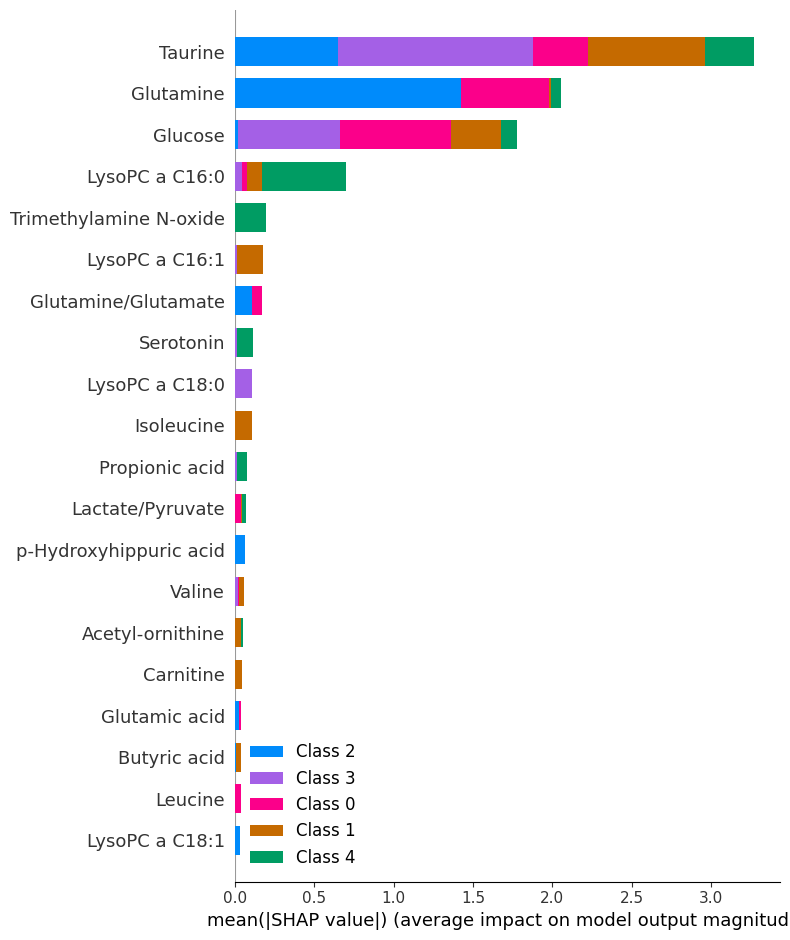

In [ ]:
shap.summary_plot(shap_values, X)

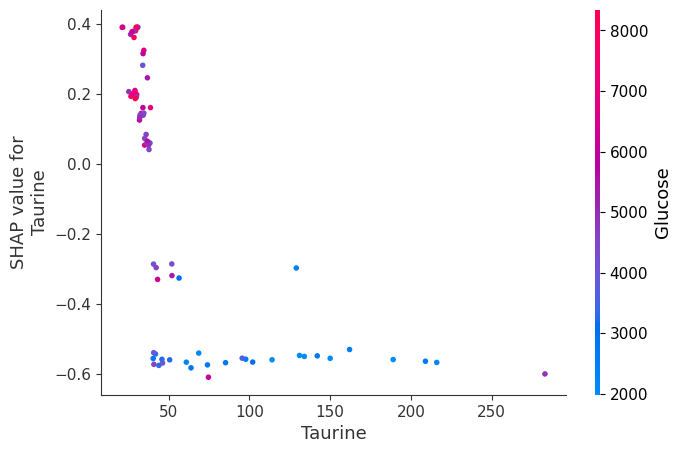

In [ ]:
shap.dependence_plot('Taurine', shap_values[0], X, interaction_index="Glucose")

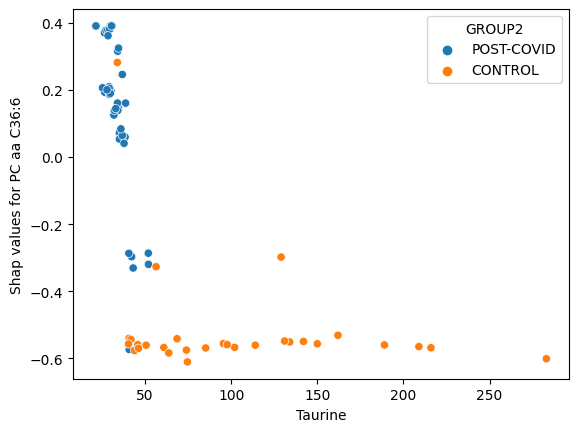

In [ ]:
xx= X['Taurine']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['Taurine']

import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=l_ctrl_vs_post_covid['GROUP2'])

# Add labels and title
plt.xlabel('Taurine')
plt.ylabel('Shap values for PC aa C36:6')

# Show the plot
plt.show()

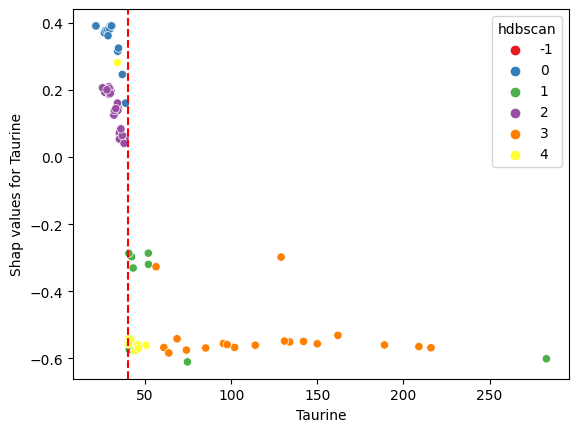

In [ ]:

string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 40 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#RULES FOR CHARECTERIZATION

##CLUSTER 0

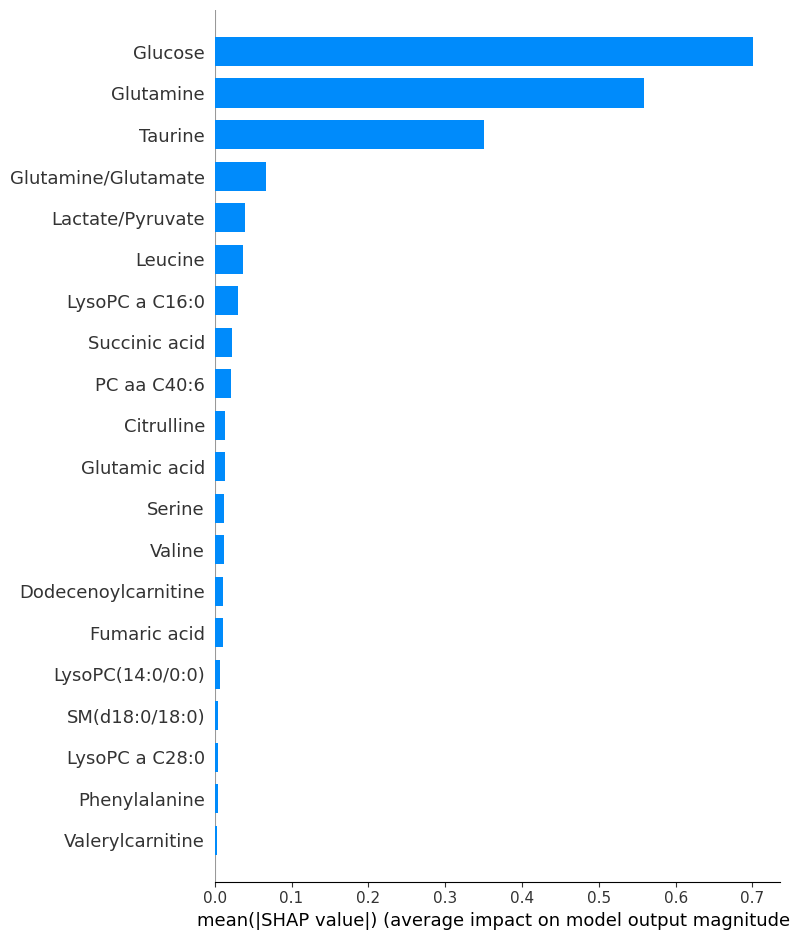

'\nGlucose\nGlutamine\nTaurine\nGlutamine/Glutamate\n'

In [ ]:
shap.summary_plot(shap_values[0], X,plot_type='bar')
"""
Glucose
Glutamine
Taurine
Glutamine/Glutamate
"""

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



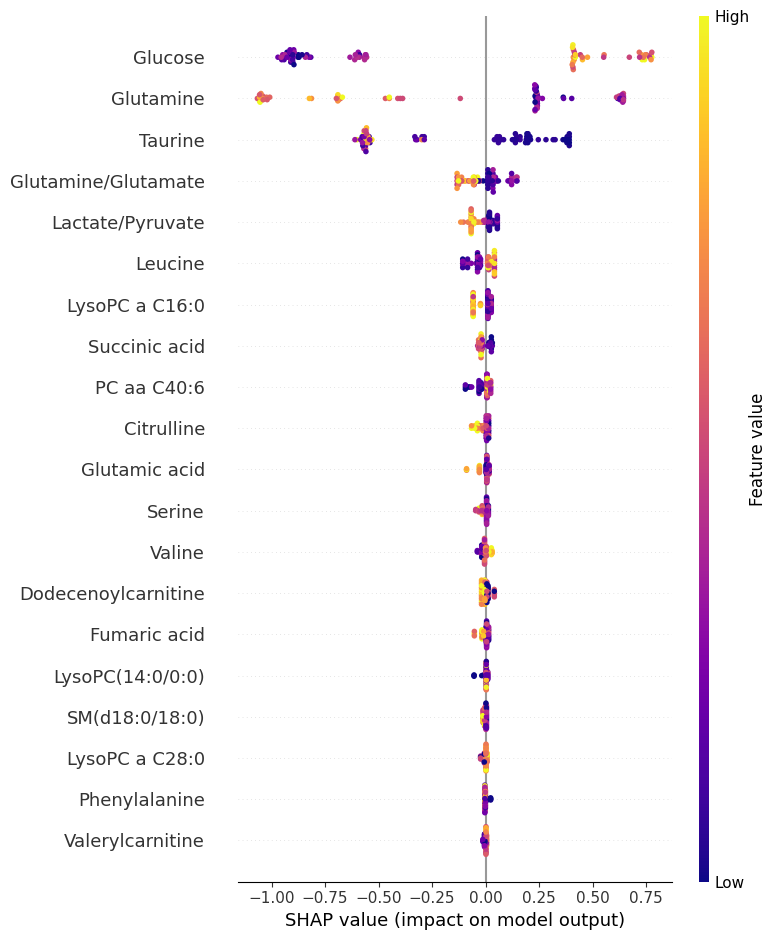

'\nGlucose\nGlutamine\nTaurine\nGlutamine/Glutamate\nLactate/Pyruvate\n'

In [ ]:
shap.summary_plot(shap_values[0], X,cmap = "plasma")

"""
Glucose
Glutamine
Taurine
Glutamine/Glutamate
Lactate/Pyruvate
"""

In [ ]:
CONTI_DF[CONTI_DF['hdbscan'] !=-1]['hdbscan']

Folio
CV19-0007A    1
CV19-0071A    3
CV19-0079A    3
CV19-0118A    4
CV19-0128A    4
             ..
5V            1
6V            1
7V            2
8V            2
9V            0
Name: hdbscan, Length: 74, dtype: int64

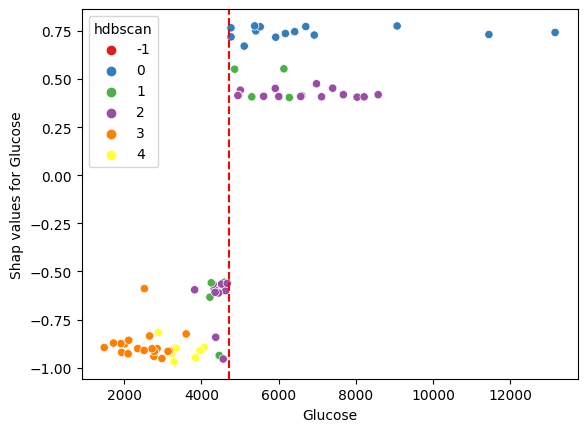

In [ ]:
"""
Glucose
Glutamine
Taurine
Glutamine/Glutamate
"""

string = 'Glucose'
xx= X[string]
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 4700 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

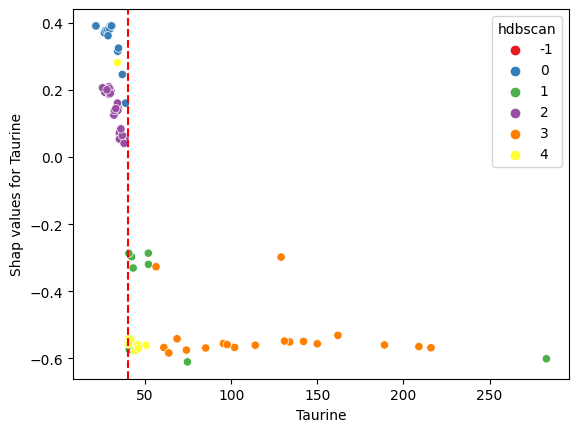

In [ ]:
"""
Glucose
Glutamine
Taurine
Glutamine/Glutamate
"""

string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 40 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

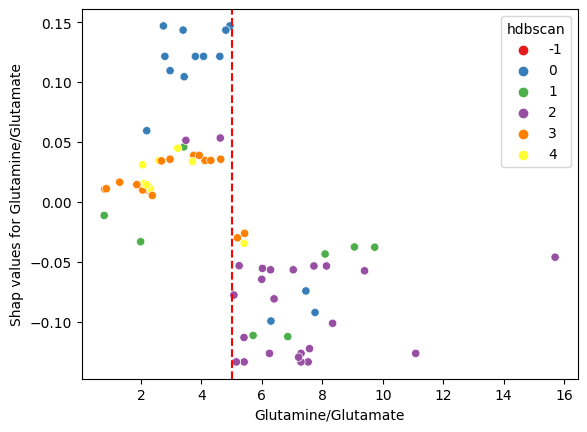

In [ ]:
"""
Glucose
Glutamine
Taurine
Glutamine/Glutamate
"""

string = 'Glutamine/Glutamate'
xx= X[string]
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 5 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

##CLUSTER 1

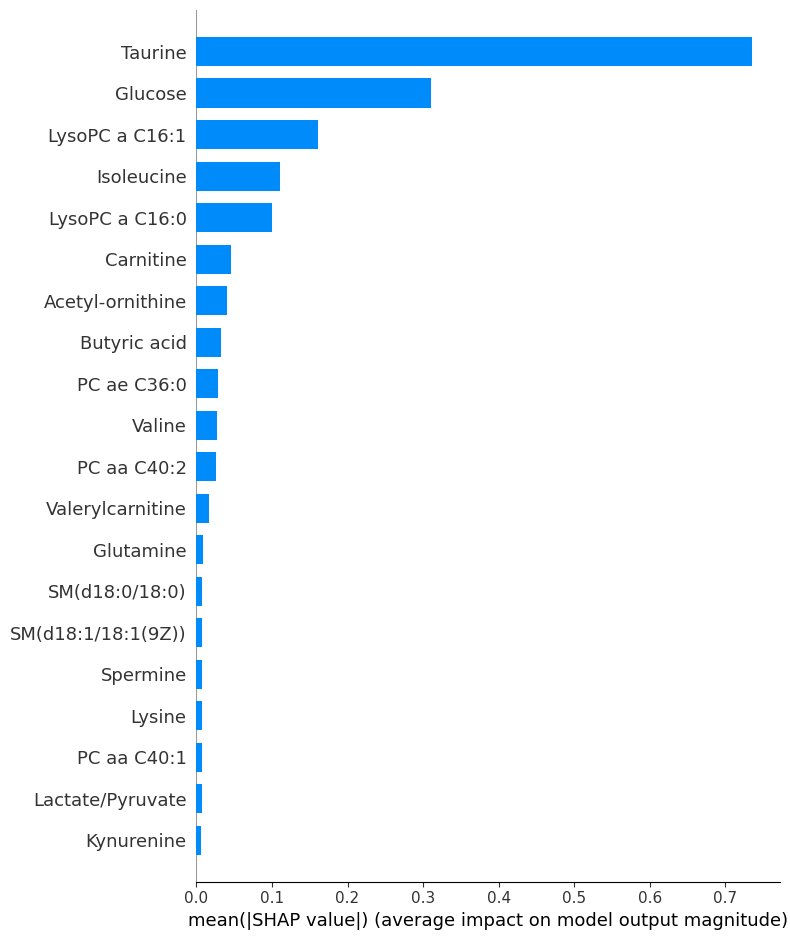

'\nTaurine\nGlucose\nLysoPC a C16:1\nIsoleucine\nLysoPC a C16:0\n'

In [ ]:
shap.summary_plot(shap_values[1], X,plot_type='bar')

"""
Taurine
Glucose
LysoPC a C16:1
Isoleucine
LysoPC a C16:0
"""

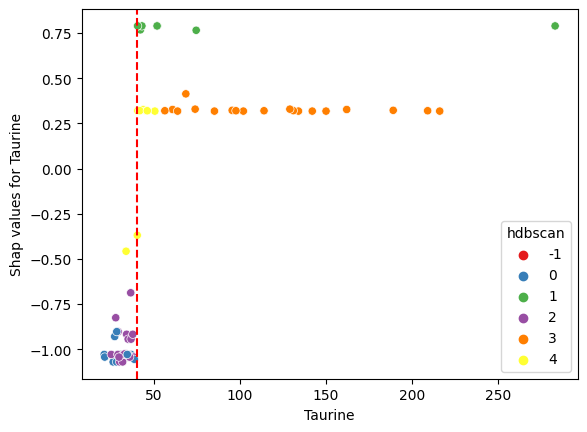

In [ ]:
"""
Taurine
Glucose
LysoPC a C16:1
Isoleucine
LysoPC a C16:0
"""
string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[1],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 40 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

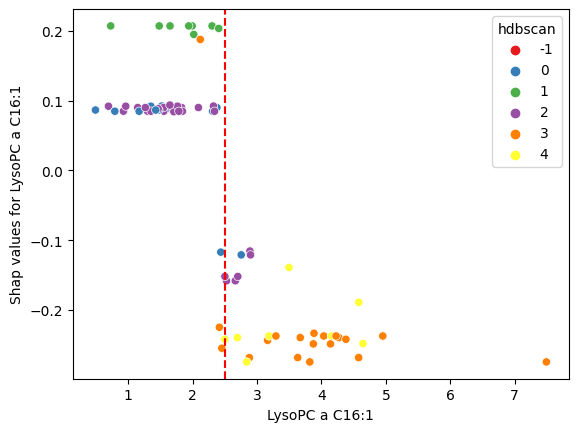

In [ ]:
"""
Taurine
Glucose
LysoPC a C16:1
Isoleucine
"""
string = 'LysoPC a C16:1'
xx= X[string]
yy = pd.DataFrame( shap_values[1],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 2.5 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

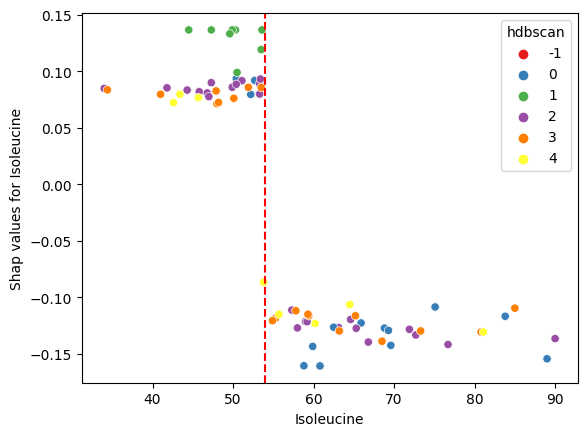

In [ ]:
"""
Taurine
Glucose
LysoPC a C16:1
Isoleucine
LysoPC a C16:0
"""
string = 'Isoleucine'
xx= X[string]
yy = pd.DataFrame( shap_values[1],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 54 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

##CLUSTER 2

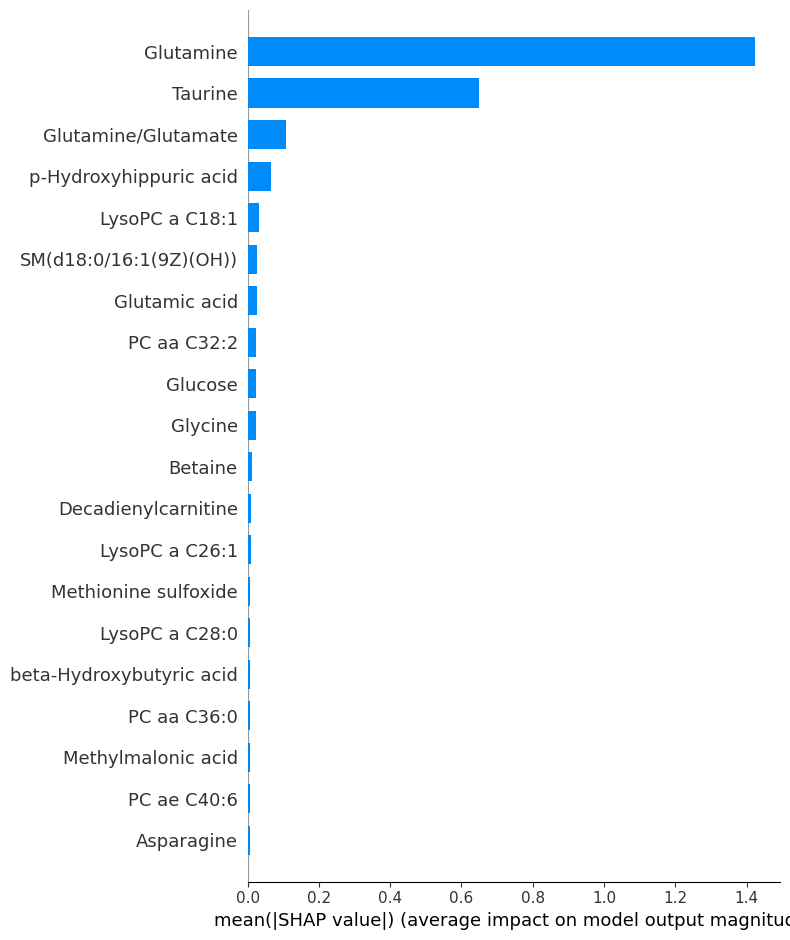

In [ ]:
shap.summary_plot(shap_values[2], X,plot_type='bar')


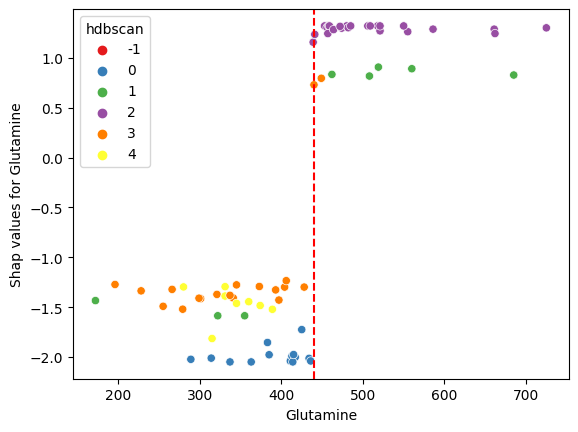

In [ ]:

"""
Glutamine
Taurine
Glutamine/Glutamate
p-Hydroxyhippuric acid
"""
string = 'Glutamine'
xx= X[string]
yy = pd.DataFrame( shap_values[2],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 440 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

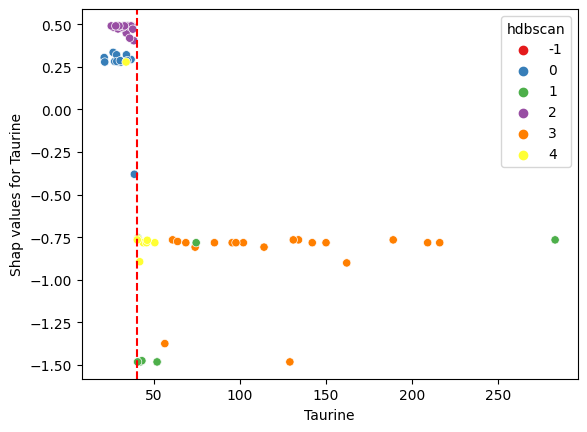

In [ ]:

"""
Glutamine
Taurine
Glutamine/Glutamate
p-Hydroxyhippuric acid
"""
string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[2],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 40 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

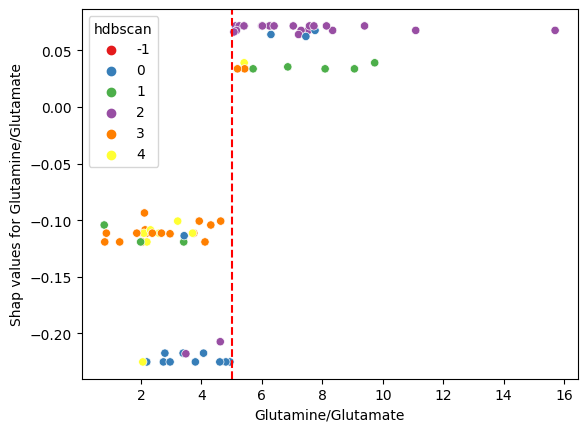

In [ ]:

"""
Glutamine
Taurine
Glutamine/Glutamate
p-Hydroxyhippuric acid
"""
string = 'Glutamine/Glutamate'
xx= X[string]
yy = pd.DataFrame( shap_values[2],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 5 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

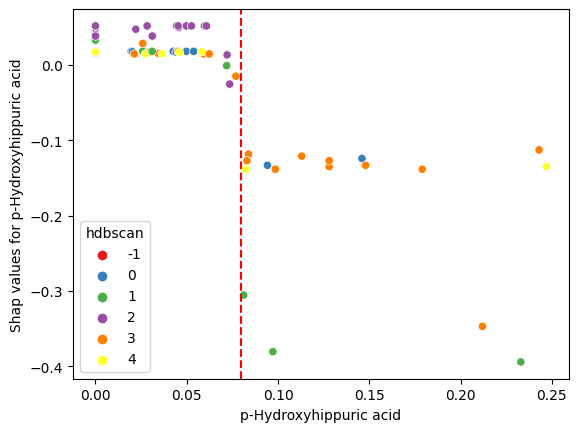

In [ ]:
"""
Glutamine
Taurine
Glutamine/Glutamate
p-Hydroxyhippuric acid
"""
string = 'p-Hydroxyhippuric acid'
xx= X[string]
yy = pd.DataFrame( shap_values[2],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.08 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

##CLUSTER 3

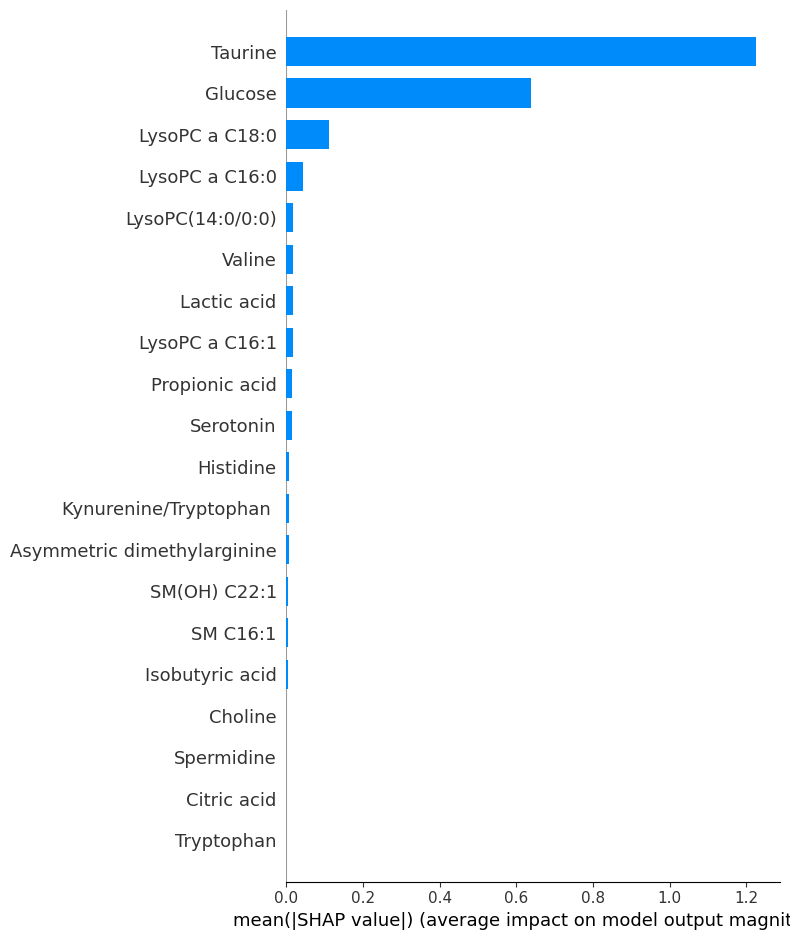

'\nTaurine\nGlucose\nLysoPC a C18:0\nLysoPC a C16:0\n'

In [ ]:
shap.summary_plot(shap_values[3], X,plot_type='bar')

"""
Taurine
Glucose
LysoPC a C18:0
LysoPC a C16:0
"""

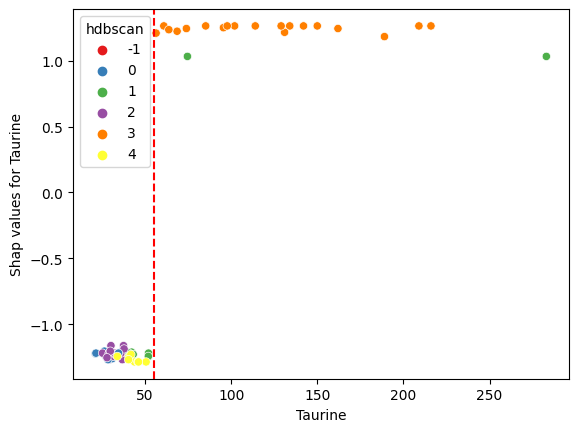

In [ ]:
string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 55 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

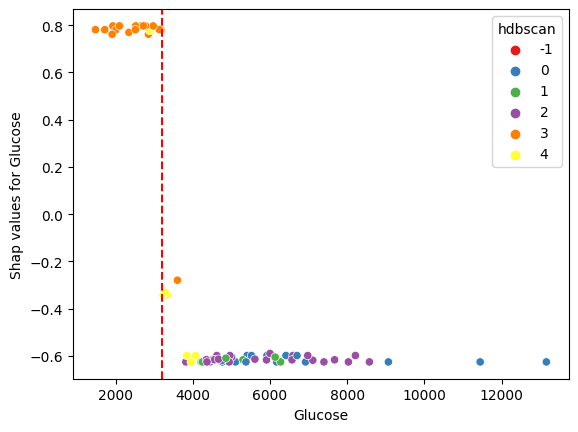

In [ ]:
string = 'Glucose'
xx= X[string]
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 3200 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

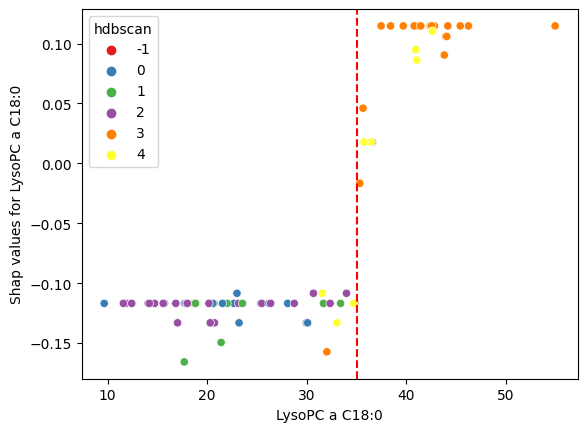

In [ ]:
string = 'LysoPC a C18:0'
xx= X[string]
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 35# Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

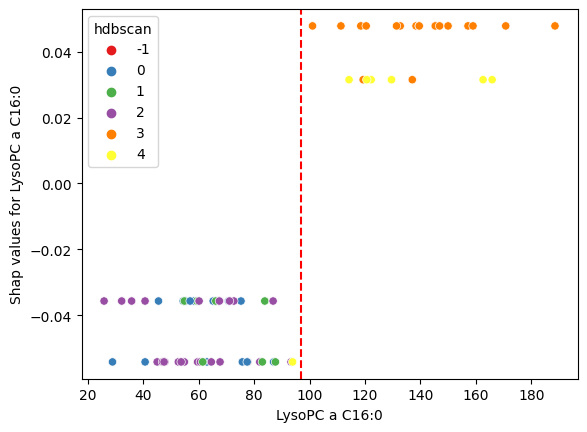

In [ ]:
string = 'LysoPC a C16:0'
xx= X[string]
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 97# Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

##CLUSTER 4

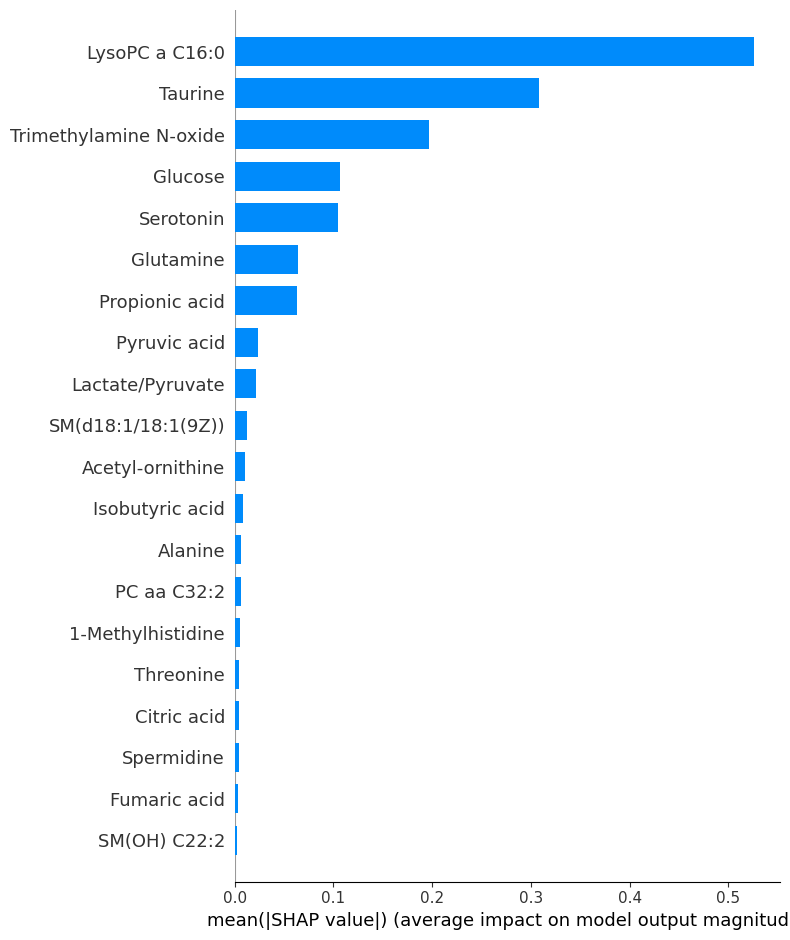

'\nLysoPC a C16:0\nTaurine\nTrimethylamine N-oxide\nGlucose\nSerotonin\nGlutamine\nPropionic acid\nPyruvic acid\n'

In [ ]:
shap.summary_plot(shap_values[4], X,plot_type='bar')

"""
LysoPC a C16:0
Taurine
Trimethylamine N-oxide
Glucose
Serotonin
Glutamine
Propionic acid
Pyruvic acid
"""


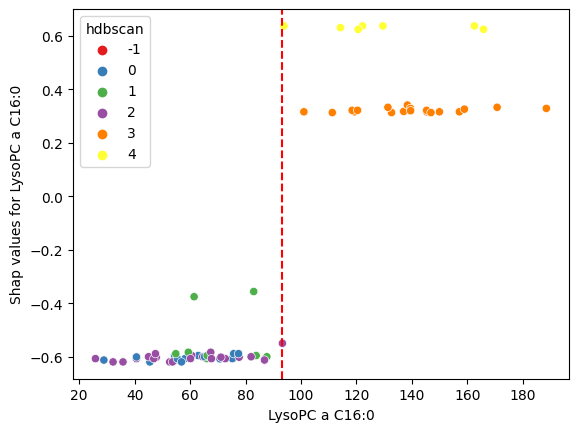

In [ ]:
"""
LysoPC a C16:0
Taurine
Trimethylamine N-oxide
Glucose
Serotonin
Glutamine
Propionic acid
Pyruvic acid
"""

string = 'LysoPC a C16:0'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 93# Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

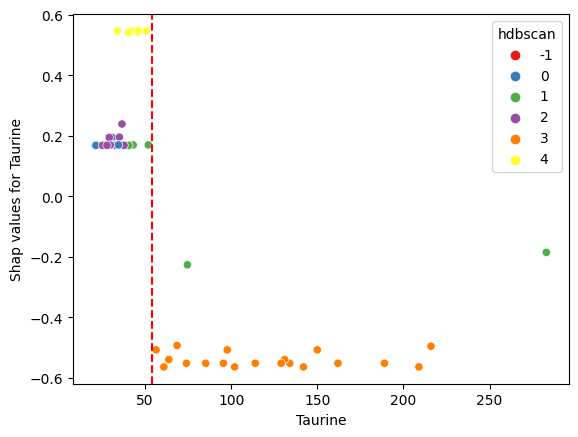

In [ ]:
"""
LysoPC a C16:0
Taurine
Trimethylamine N-oxide
Glucose
Serotonin
Glutamine
Propionic acid
Pyruvic acid
"""

string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )
# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))
# Draw a vertical line
x_value = 54# Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')
# Show the plot
plt.show()

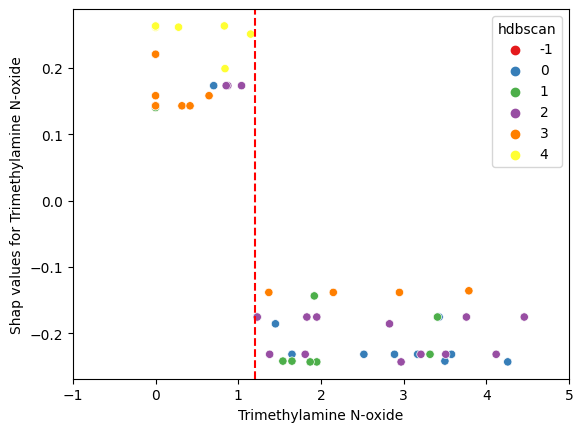

In [ ]:
"""
LysoPC a C16:0
Taurine
Trimethylamine N-oxide
Glucose
Serotonin
Glutamine
Propionic acid
Pyruvic acid
"""

string = 'Trimethylamine N-oxide'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )
# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))
# Draw a vertical line
x_value = 1.2# Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')
# Show the plot
# Set limits for the x-axis
x_lower_limit = -1  # Set the lower limit for the x-axis
x_upper_limit = 5  # Set the upper limit for the x-axis
plt.xlim(x_lower_limit, x_upper_limit)
plt.show()

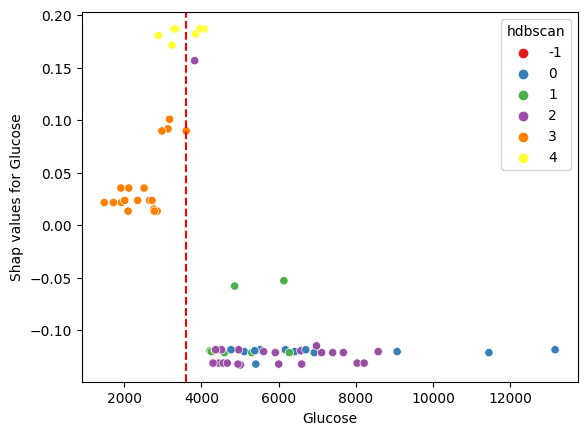

In [ ]:
"""
LysoPC a C16:0
Taurine
Trimethylamine N-oxide
Glucose
Serotonin
Glutamine
Propionic acid
Pyruvic acid
"""

string = 'Glucose'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )
# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))
# Draw a vertical line
x_value = 3600# Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')
# Show the plot
plt.show()

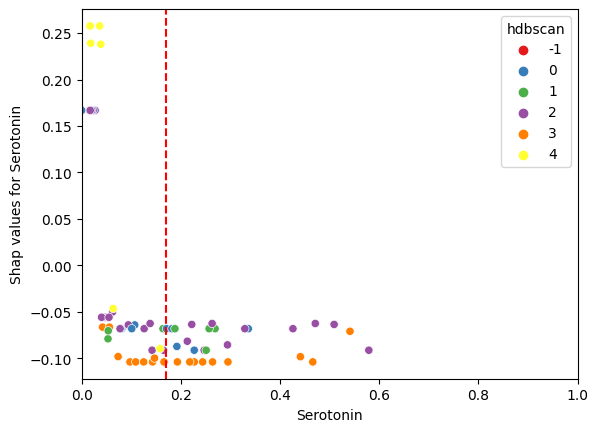

In [ ]:
"""
LysoPC a C16:0
Taurine
Trimethylamine N-oxide
Glucose
Serotonin
Glutamine
Propionic acid
Pyruvic acid
"""

string = 'Serotonin'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='Set1' )
# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))
# Draw a vertical line
x_value = 0.17# Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')
# Set limits for the x-axis
x_lower_limit = 0 # Set the lower limit for the x-axis
x_upper_limit = 1  # Set the upper limit for the x-axis
plt.xlim(x_lower_limit, x_upper_limit)

# Show the plot
plt.show()